# Final Project: Evaluating Emcee 
### Author: Madeline Springer | Course: PHYS265 | Date: May 16, 2025

### 1: name of the package, describe what is the basic aim of what the package does or solve?
The name of this package is emcee and it is a Python package for conducting Markov Chain Monte Carlo (MCMC) sampling. It is usually used for Bayesian inference which is a method of statistical inference where you calculate the probability of a hypothesis based on prior information and then it updates as new information becomes available. Emcee estimates the distribution of model parameters based on this information instead of producing a single best-fit value.

### 2: why/how did you select this package? 
I chose emcee because I know that it is widely used in scientific data analysis. I currently have an internship where I am using Python for image analysis and need to find the best-fit for a curve so I thought exploring a package applicable to my work might be interesting. Whether or not I use emcee at my internship after completing this, I know it will be useful for any form of parameter estimation with uncertainty and provide me with a better understanding of Python.

### 3: how old is the package? does it have a geneology, i.e. what related codes came before or after. are there other codes you can find that solve the same problem? 
Emcee was first released around 2012 and developed by Dan Foreman-Mackey and several other collaborators. It is inspired by the affine-invariant ensemble sampler method which was created by Goodman and Weare in 2010. There are other tools that do similar things like PyMC3 and PyMC which let you build more complex Bayesian models, Stan and pystan which are powerful but harder to use, and dynesty which is another newer MCMC tool. All these tools solve the same kinds of problems: figuring out uncertain model parameters.

### 4: is it still maintained, and by the original author(s)? Are there instructions how to contribute to this project?
Yes, it is. The author, Dan Foreman-Mackey, and others continue to update it and anyone can contribute by going to the GitHub page and following the instructions on how to suggest changes or improvements (https://github.com/dfm/emcee).

### 5: evaluate how easy it was to install and use. What commands did you use to install?
It was super easy. I just used pip to install the package and then Python downloaded and installed it automatically.

In [5]:
!pip install emcee

### 6: does it install via the "standard" pip/conda, or is it more complex?
Yes, it does install using the "standard" pip/conda. Either one works!

### 7: is the source code available? For example, "pip install galpy" may get it to you, but where can you inspect the code?
The source code is available on the page that I linked earlier (https://github.com/dfm/emcee). On its GitHub page, you can read and download the code in addition to suggesting changes to improve it or fix any bugs.

### 8: is the code used by other packages (if so, give one or two examples). ASCL codes have citations via their ADS link. See also 22.
Yes, other Python tools use this code and work well with emcee. For example, corner.py which makes triangle plots that show the output of your sampling and batman which is used to model light curves of planets as they pass in front of stars.

### 9: How is the code used. Is it commandline, python script, or a jupyter notebook, or even a web interface? 
Emcee is usually used as a Python library so it's run from inside a Jupyter notebook or Python script. It technically could be called from the commandline, but it's much more frequently used in Jupyter notebooks because they let you add comments, visualize better, and include live code execution so they're better for exploring and experimenting. For this project, I'm using emcee from a Jupyter notebook which makes it easy to test the code and document the process in one place.

### 10: provide examples using the code. if you prefer to use a jupyter notebook instead of a python script, that's ok. See also 12.

Below are two examples of how you can use emcee. The first example comes directly from emcee's page on GitHub (which can be found at https://emcee.readthedocs.io/en/v3.1.3/). It samples from a 5-dimensional multivariate Gaussian and defines the log-probability directly in terms of the parameters without using any real data. It's good for testing and understanding the mechanics of this sampler. The second is a real world example of how you can use emcee to fit noisy data to a straight line (y = mx + b). It defines a likelihood function based on the Gaussian noise model and uses priors to define the parameter space before creating a corner plot to show the distributions. This example demonstrates how emcee is helpful in data analysis.

In [6]:
## Example 1: Sampling from a Multivariate Gaussian 
import numpy as np
import emcee

# Define the likelihood
def log_prob(x, ivar):
    return -0.5 * np.sum(ivar * x ** 2)

# Set up the walkers
ndim, nwalkers = 5, 100
ivar = 1. / np.random.rand(ndim)
p0 = np.random.randn(nwalkers, ndim)

# Create the sampler and run the MCMC chain
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob, args=[ivar])
sampler.run_mcmc(p0, 10000)

State([[ 8.52344473e-02 -3.44431854e-01 -1.05918707e+00 -1.53065431e+00
  -7.59759724e-02]
 [-7.16565987e-01 -4.88900028e-01  1.17090289e+00 -1.51466291e+00
   2.66978936e-01]
 [-5.48526060e-01  1.39354473e+00 -6.36425724e-01 -6.24029630e-01
  -1.44991088e-01]
 [-1.96890871e-02  4.09209556e-01  1.76992437e-01 -4.44071327e-01
  -2.77029879e-01]
 [ 2.90746922e-02  6.74571989e-01  1.04683827e-01 -1.23611159e+00
   1.88860502e-01]
 [ 2.10405116e-01  5.22515971e-01 -2.86701704e-02  2.51296379e-01
   2.23448885e-02]
 [-6.71862165e-01 -1.17709862e+00 -2.85037951e-01  3.29029943e-01
   1.60219220e-01]
 [-1.30115470e+00 -1.64957189e+00  2.22840222e-01 -1.25461566e+00
  -9.97355225e-02]
 [-1.28496491e-01  4.99733333e-01  1.07995483e-01  3.22328166e-01
  -3.82323220e-01]
 [ 8.51352266e-01  9.34345379e-01  5.87537358e-01  7.57781837e-01
  -3.89438927e-01]
 [ 9.80862262e-02  1.05912772e+00  2.65401367e-01  2.98064356e-01
   4.60407197e-01]
 [ 1.65999145e-01 -2.96265623e-01  1.56447471e-01 -5.044493

In [7]:
## Example 2: Linear Regression
import matplotlib.pyplot as plt

# Generate random data
np.random.seed(0)
x = np.sort(10 * np.random.rand(50))
y = 3.5 * x + 2.0 + np.random.randn(50)
yerr = np.ones_like(y)

# Define the model, likelihood, and prior
def log_likelihood(theta, x, y, yerr):
    m, b = theta
    model = m * x + b
    sigma2 = yerr ** 2
    return -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(sigma2))

def log_prior(theta):
    m, b = theta
    if 0.0 < m < 10.0 and 0.0 < b < 10.0:
        return 0.0
    return -np.inf

def log_probability(theta, x, y, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y, yerr)

# Set up the walkers
pos = np.array([3.0, 1.0]) + 1e-4 * np.random.randn(32, 2)
nwalkers, ndim = pos.shape
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(x, y, yerr))
sampler.run_mcmc(pos, 2000, progress=True)

100%|██████████| 2000/2000 [00:01<00:00, 1624.22it/s]


State([[3.58163327 1.43143276]
 [3.63425774 1.27656078]
 [3.58925415 1.46163527]
 [3.57898398 1.42371987]
 [3.61495741 1.21390997]
 [3.59623161 1.1797618 ]
 [3.46934781 1.92476533]
 [3.53496416 1.78897428]
 [3.5785037  1.52360705]
 [3.52823923 1.90579581]
 [3.5943083  1.50039943]
 [3.53611232 1.63381291]
 [3.54327863 1.74700485]
 [3.54876956 1.86455554]
 [3.58100874 1.46176432]
 [3.56875741 1.45186881]
 [3.54419091 1.46161588]
 [3.61861667 1.1340739 ]
 [3.59433691 1.43524911]
 [3.5629808  1.52261368]
 [3.55331991 1.65084682]
 [3.55698162 1.45582147]
 [3.51744417 1.75714659]
 [3.50236727 1.71956847]
 [3.62059055 0.87782271]
 [3.58274348 1.45679548]
 [3.50112777 1.74035982]
 [3.67228408 0.9520242 ]
 [3.63032156 1.03488564]
 [3.53536362 1.63789948]
 [3.49493886 1.71981436]
 [3.5903351  1.14233356]], log_prob=[-20.38133941 -21.58629678 -20.6729043  -20.34714844 -20.54403065
 -20.79833347 -22.77651505 -21.29402808 -20.6871485  -22.18389389
 -21.17800503 -20.71517367 -21.18453248 -22.7737689

### 11: does the package produce figures, or are you on your own? Is matplotlib used? 
Emcee doesn't create any figures automatically, but it works very well with matplotlib. Users must generate their own figures using the output of emcee which is structured so that creating plots is fairly straightforward. Emcee's creators also provide many examples on how to plot its output in their guide. 

### 12: your code and report should show at least one figure, and create a nice figure caption explaining what it shows. You notebook should show how the figure was made (i.e. be reproducable). Second figure is optional, but only use it when you need to illustrate something extra.

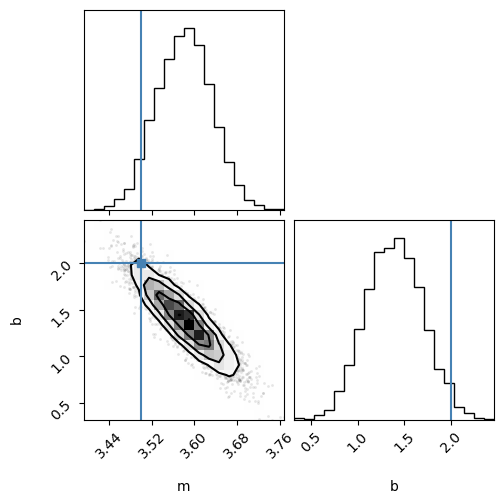

In [8]:
# Plot the result from Question 10
!pip install corner
import corner
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
fig = corner.corner(flat_samples, labels=["m", "b"], truths=[3.5, 2.0])

The corner plot above shows the posterior probability distributions of the model parameters (slope m and y-intercept b for y = mx + b). This figure was created in this notebook and it's reproducible. The top left plot is the histogram of sampled slope and the bottom right plot is the histogram of the sampled y-intercepts. Then, in the bottom left, the plot demonstrates the relationship between the slope and intercept in the posterior distribution. Each dot is one sample from the MCMC sampler and the contours show regions of equal probability density (darker = more likely, lighter = less likely). The tighter and smaller the contours, the less uncertainty is present. As for the tilt, it means that slope and intercept are correlated so if you change one slightly, you can change the other to compensate and try to preserve the fit. The more circular the contours are, the more independent your parameters are. 

### 13: is the package pure python? or does it need accompanying C/C++/Fortran code? 
Emcee is a pure Python package and does not need any accompanying C/C++/Fortran code. This way the package is portable and very easy to install on any platform just by using pip like I did earlier.

### 14: what is the input to the package? Just parameters, or dataset(s), or can they be generated from scratch?
Emcee's primary input is a function that defines the log-probability. As you can see in my earlier example, it's often made up of a prior and likelihood. Also, you input an initial guess for the parameter values. You can pass in data as arguments to the likelihood function to define it as needed. 

### 15: what is the output of the package? Just parameters, or dataset(s)?, or just a screen output you would need to capture
The output of emcee is a multidimensional NumPy array with the sampled values of the parameters from all of the walkers. You can use the data to estimate the best-fit parameters, graph the posterior distribution, and/or calculate the uncertainties. 

### 16: does the code provide any unit tests, regression or benchmarking?
Yes, emcee does. It includes a test suite that you can run with pytest. The code (on GitHub) will integrate continuously and automatically runs tests when changes are made to ensure that updates don't break anything. 

### 17: how can you feel confident the code produce a reliable result? (see also previous question)
Emcee is used very widley and cited in hundreds of peer-reviewed papers so it's obvious that it's reliable and trusted in comparison to some more niche packages. It also has open-source tests and examples to show how it performs in known situations. Plus, its algorithm, which is an affine-invariant ensemble sampler, was published in a respected paper and is mathematically based (Goodman & Weare, 2010). You can check the convergence in order to verify the results too.

### 18: what (main) python package(s) does it use or depend on (e.g. numpy, curve_fit, solve_ivp) - how did you find this out?
Emcee depends on numpy for numerical operations, scipy sometimes for user-defined likelihoods, tqdm for showing progress bars, and then you can also use corner like I did previously to make plots. Corner isn't required to use emcee itself, but it's very important for visualizing and better understanding its results. I found all this using the line of code below and then accessing its home page again for more information. 

In [9]:
pip show emcee

Name: emcee
Version: 3.1.6
Summary: The Python ensemble sampling toolkit for MCMC
Home-page: https://emcee.readthedocs.io
Author: Daniel Foreman-Mackey
Author-email: foreman.mackey@gmail.com
License: MIT
Location: /Users/madelinespringer/Library/jupyterlab-desktop/envs/sophemadi/lib/python3.12/site-packages
Requires: numpy
Required-by: 
Note: you may need to restart the kernel to use updated packages.


### 19: what kind of documentation does the package provide? was it sufficient for you?
The package has a home page with documentation (see above) and it has lots of information including a quickstart guide, API references, example notebooks, and the mathematical background of the code. It was very easy to understand so I know it's good for beginners (me) and it was the main source of my understanding of how to write the MCMC code. 

### 20: if you use this code in a paper, do they give a preferred citation method? 
Yep! They include a preferred citation on the documentation site which is as follows:

Foreman-Mackey, D., et al. (2013). “emcee: The MCMC Hammer.” Publications of the Astronomical Society of the Pacific, 125(925), 306. DOI:10.1086/670067 (https://doi.org/10.1086/670067)

### 21: provide any other references you used in your report.

1. Foreman-Mackey et al. (2013), original emcee paper.
2. emcee documentation: https://emcee.readthedocs.io
3. corner.py documentation: https://corner.readthedocs.io

### 22: can you find two other papers that used this package. E.g. use ADS citations for ASCL based code. See also 8.
Yes, I found two other papers that used this package from NASA ADS because emcee is used a lot in astrophysics and they are listed below. 
1. Agol et al. (2020) – “Transit Timing Variations with TESS” (used emcee for Bayesian modeling)
2. Barbary et al. (2017) – “sncosmo: Python library for supernova cosmology” (used emcee for parameter fitting)

### 23: did you have to learn new python methods to use this package? Or was the class good enough to get you through this project.
Yes, I did use new Python methods while working with emcee. I already learned about MCMC in class, but I got more practice working with corner and also with defining log-likelihood and log-prior functions. Emcee is simple enough that I was able to get pretty far based on my understanding of coding from the class, but also doing it yourself is different than typing what a professor instructs you to so I kind of had to think a little more.

### 24: Final Disclaimer: you need to state if you have prior experience in using the package or the data, or this is all new to you. In addition, if you collaborated in a group, as long as this is your work.
I've never used emcee before so it's all new to me and I did talk about the project with others doing emcee to clarify and confirm some of my answers, but I completed this report entirely on my own. 